In [ ]:

# Cài đặt thư viện cần thiết
!pip install pandas matplotlib scikit-learn seaborn


In [ ]:

# Cài đặt thư viện và tải dữ liệu từ Kaggle
!pip install opendatasets pandas matplotlib scikit-learn seaborn

import opendatasets as od
import pandas as pd
import os

# Tải dữ liệu từ Kaggle
kaggle_url = 'https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/data'
od.download(kaggle_url)

# Xác định đường dẫn tệp
download_folder = './consumer-behavior-and-shopping-habits-dataset'
print("Danh sách các tệp trong thư mục:", os.listdir(download_folder))

# Đọc dữ liệu từ tệp
data_path = os.path.join(download_folder, 'shopping_behavior_updated.csv')  # Thay đổi nếu tệp có tên khác
data = pd.read_csv(data_path)

# Hiển thị thông tin cơ bản
print("Dataset Info:")
print(data.info())
print("\nSample Data:")
print(data.head())

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: laiphukhoinguyen
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset


100%|██████████| 146k/146k [00:00<00:00, 32.8MB/s]


Danh sách các tệp trong thư mục: ['shopping_trends.csv', 'shopping_behavior_updated.csv']
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   o

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
categorical_columns = ['Gender', 'Category', 'Promo Code Used', 'Location', 'Size', 'Color',
                       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
                       'Payment Method', 'Frequency of Purchases']

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Tách dữ liệu thành đầu vào (X) và đầu ra (y) cho từng bài toán
X = data.drop(columns=['Gender', 'Category', 'Promo Code Used', 'Customer ID', 'Item Purchased'])
y_gender = data['Gender']
y_category = data['Category']
y_promo = data['Promo Code Used']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X, y_gender, test_size=0.3, random_state=42)
X_train_category, X_test_category, y_train_category, y_test_category = train_test_split(X, y_category, test_size=0.3, random_state=42)
X_train_promo, X_test_promo, y_train_promo, y_test_promo = train_test_split(X, y_promo, test_size=0.3, random_state=42)


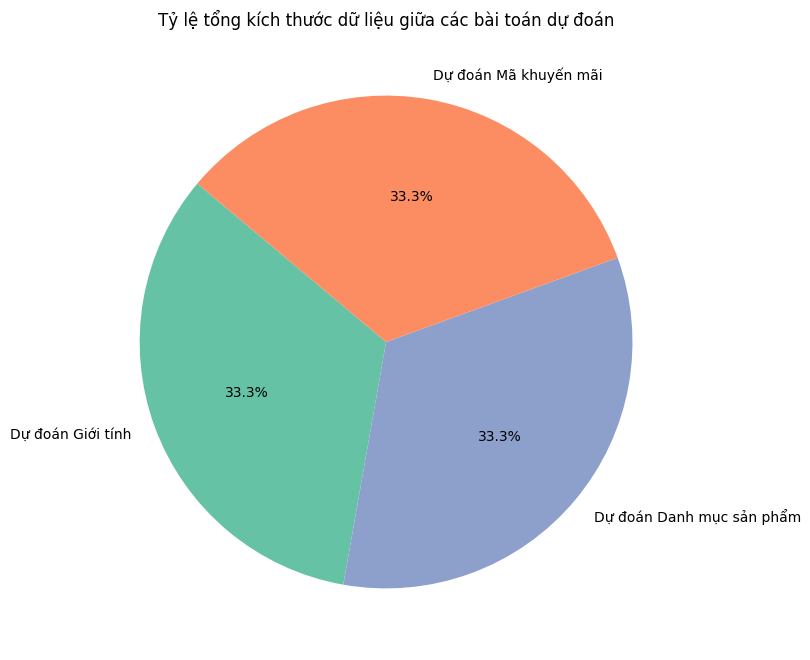

In [ ]:
import matplotlib.pyplot as plt

# Tổng hợp dữ liệu kích thước
sizes_combined = [
    sum(sizes_gender),  # Tổng kích thước Dự đoán Giới tính
    sum(sizes_category),  # Tổng kích thước Dự đoán Danh mục sản phẩm
    sum(sizes_promo),  # Tổng kích thước Dự đoán Mã khuyến mãi
]
labels_combined = ['Dự đoán Giới tính', 'Dự đoán Danh mục sản phẩm', 'Dự đoán Mã khuyến mãi']

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(
    sizes_combined,
    labels=labels_combined,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66c2a5', '#8da0cb', '#fc8d62'],
)
plt.title('Tỷ lệ tổng kích thước dữ liệu giữa các bài toán dự đoán')
plt.show()




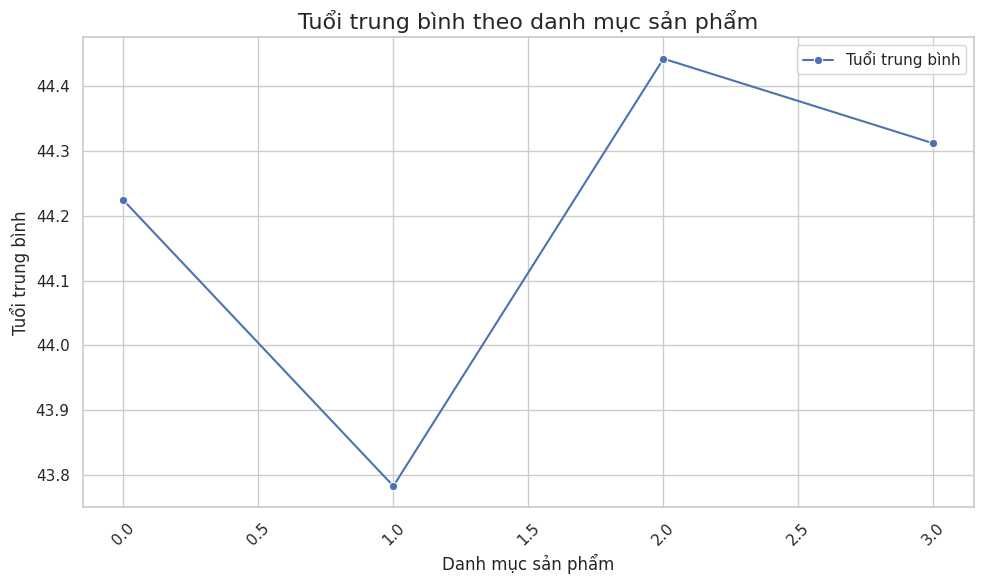

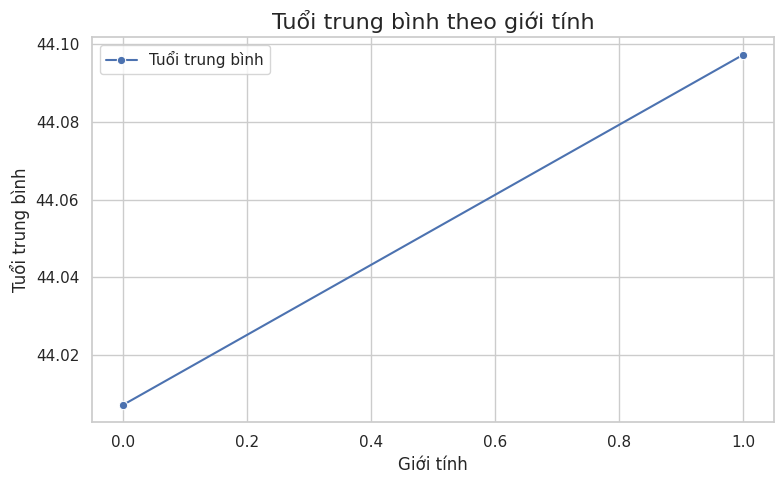

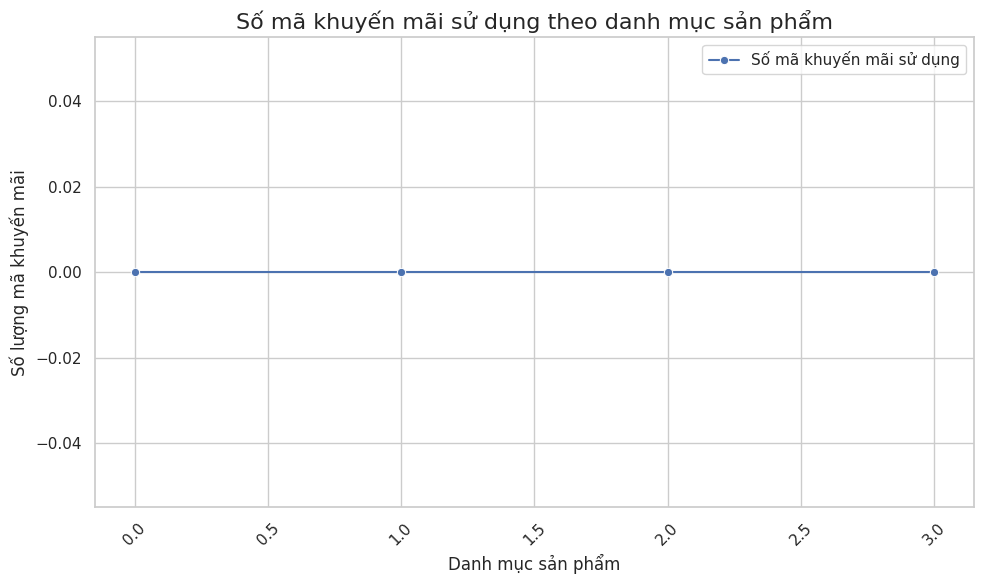

In [ ]:
sns.set(style="whitegrid")

age_by_category = data.groupby('Category')['Age'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.lineplot(x=age_by_category.index, y=age_by_category.values, marker='o', label='Tuổi trung bình')
plt.title('Tuổi trung bình theo danh mục sản phẩm', fontsize=16)
plt.xlabel('Danh mục sản phẩm', fontsize=12)
plt.ylabel('Tuổi trung bình', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

age_by_gender = data.groupby('Gender')['Age'].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=age_by_gender.index, y=age_by_gender.values, marker='o', label='Tuổi trung bình')
plt.title('Tuổi trung bình theo giới tính', fontsize=16)
plt.xlabel('Giới tính', fontsize=12)
plt.ylabel('Tuổi trung bình', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

promo_usage_by_category = data.groupby('Category')['Promo Code Used'].apply(lambda x: (x == "Yes").sum())
plt.figure(figsize=(10, 6))
sns.lineplot(x=promo_usage_by_category.index, y=promo_usage_by_category.values, marker='o', label='Số mã khuyến mãi sử dụng')
plt.title('Số mã khuyến mãi sử dụng theo danh mục sản phẩm', fontsize=16)
plt.xlabel('Danh mục sản phẩm', fontsize=12)
plt.ylabel('Số lượng mã khuyến mãi', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Hiển thị kích thước dữ liệu
print("Kích thước tập huấn luyện và kiểm tra (Dự đoán Giới tính):")
print("X_train_gender:", X_train_gender.shape, "| X_test_gender:", X_test_gender.shape)
print("y_train_gender:", y_train_gender.shape, "| y_test_gender:", y_test_gender.shape)

print("\nKích thước tập huấn luyện và kiểm tra (Dự đoán Danh mục):")
print("X_train_category:", X_train_category.shape, "| X_test_category:", X_test_category.shape)
print("y_train_category:", y_train_category.shape, "| y_test_category:", y_test_category.shape)

print("\nKích thước tập huấn luyện và kiểm tra (Dự đoán Mã khuyến mãi):")
print("X_train_promo:", X_train_promo.shape, "| X_test_promo:", X_test_promo.shape)
print("y_train_promo:", y_train_promo.shape, "| y_test_promo:", y_test_promo.shape)


Kích thước tập huấn luyện và kiểm tra (Dự đoán Giới tính):
X_train_gender: (2730, 13) | X_test_gender: (1170, 13)
y_train_gender: (2730,) | y_test_gender: (1170,)

Kích thước tập huấn luyện và kiểm tra (Dự đoán Danh mục):
X_train_category: (2730, 13) | X_test_category: (1170, 13)
y_train_category: (2730,) | y_test_category: (1170,)

Kích thước tập huấn luyện và kiểm tra (Dự đoán Mã khuyến mãi):
X_train_promo: (2730, 13) | X_test_promo: (1170, 13)
y_train_promo: (2730,) | y_test_promo: (1170,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Huấn luyện Decision Tree cho từng bài toán
dt_gender = DecisionTreeClassifier(random_state=42)
dt_gender.fit(X_train_gender, y_train_gender)
y_pred_gender_dt = dt_gender.predict(X_test_gender)

dt_category = DecisionTreeClassifier(random_state=42)
dt_category.fit(X_train_category, y_train_category)
y_pred_category_dt = dt_category.predict(X_test_category)

dt_promo = DecisionTreeClassifier(random_state=42)
dt_promo.fit(X_train_promo, y_train_promo)
y_pred_promo_dt = dt_promo.predict(X_test_promo)

# Huấn luyện Random Forest cho từng bài toán
rf_gender = RandomForestClassifier(random_state=42)
rf_gender.fit(X_train_gender, y_train_gender)
y_pred_gender_rf = rf_gender.predict(X_test_gender)

rf_category = RandomForestClassifier(random_state=42)
rf_category.fit(X_train_category, y_train_category)
y_pred_category_rf = rf_category.predict(X_test_category)

rf_promo = RandomForestClassifier(random_state=42)
rf_promo.fit(X_train_promo, y_train_promo)
y_pred_promo_rf = rf_promo.predict(X_test_promo)


In [ ]:
# Hàm đánh giá mô hình
def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Độ chính xác:", accuracy_score(y_test, y_pred))
    print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
    print("F1 Score (Micro):", f1_score(y_test, y_pred, average='micro'))
    print("Báo cáo phân loại:\n", classification_report(y_test, y_pred))
    print("Ma trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred))
    print("\n")

# Đánh giá Decision Tree
evaluate_model(y_test_gender, y_pred_gender_dt, "Decision Tree - Dự đoán Giới tính")
evaluate_model(y_test_category, y_pred_category_dt, "Decision Tree - Dự đoán Danh mục")
evaluate_model(y_test_promo, y_pred_promo_dt, "Decision Tree - Dự đoán Mã khuyến mãi")

# Đánh giá Random Forest
evaluate_model(y_test_gender, y_pred_gender_rf, "Random Forest - Dự đoán Giới tính")
evaluate_model(y_test_category, y_pred_category_rf, "Random Forest - Dự đoán Danh mục")
evaluate_model(y_test_promo, y_pred_promo_rf, "Random Forest - Dự đoán Mã khuyến mãi")

--- Decision Tree - Dự đoán Giới tính ---
Độ chính xác: 0.7273504273504273
F1 Score (Macro): 0.6782641452832677
F1 Score (Micro): 0.7273504273504273
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.52      0.59      0.55       336
           1       0.82      0.78      0.80       834

    accuracy                           0.73      1170
   macro avg       0.67      0.69      0.68      1170
weighted avg       0.74      0.73      0.73      1170

Ma trận nhầm lẫn:
 [[197 139]
 [180 654]]


--- Decision Tree - Dự đoán Danh mục ---
Độ chính xác: 0.3076923076923077
F1 Score (Macro): 0.2507503265676717
F1 Score (Micro): 0.3076923076923077
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.30      0.30      0.30       367
           1       0.42      0.40      0.41       524
           2       0.15      0.15      0.15       185
           3       0.13      0.17      0.15        94

    accuracy        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd

# Hàm tạo bảng so sánh kết quả
def compare_results(models, y_tests, y_preds):
    results = []
    for model, y_test, y_pred in zip(models, y_tests, y_preds):
        results.append({
            "Model": model,
            "Accuracy": accuracy_score(y_test, y_pred),
            "F1 Macro": f1_score(y_test, y_pred, average='macro'),
            "F1 Micro": f1_score(y_test, y_pred, average='micro')
        })
    return pd.DataFrame(results)

# Tổng hợp kết quả
models = [
    "Decision Tree - Gender", "Random Forest - Gender",
    "Decision Tree - Category", "Random Forest - Category",
    "Decision Tree - Promo", "Random Forest - Promo"
]
y_tests = [y_test_gender, y_test_gender, y_test_category, y_test_category, y_test_promo, y_test_promo]
y_preds = [y_pred_gender_dt, y_pred_gender_rf, y_pred_category_dt, y_pred_category_rf, y_pred_promo_dt, y_pred_promo_rf]

comparison_table = compare_results(models, y_tests, y_preds)
print("So sánh kết quả giữa các mô hình:")
print(comparison_table)


So sánh kết quả giữa các mô hình:
                      Model  Accuracy  F1 Macro  F1 Micro
0    Decision Tree - Gender  0.727350  0.678264  0.727350
1    Random Forest - Gender  0.736752  0.713090  0.736752
2  Decision Tree - Category  0.307692  0.250750  0.307692
3  Random Forest - Category  0.410256  0.203544  0.410256
4     Decision Tree - Promo  1.000000  1.000000  1.000000
5     Random Forest - Promo  1.000000  1.000000  1.000000


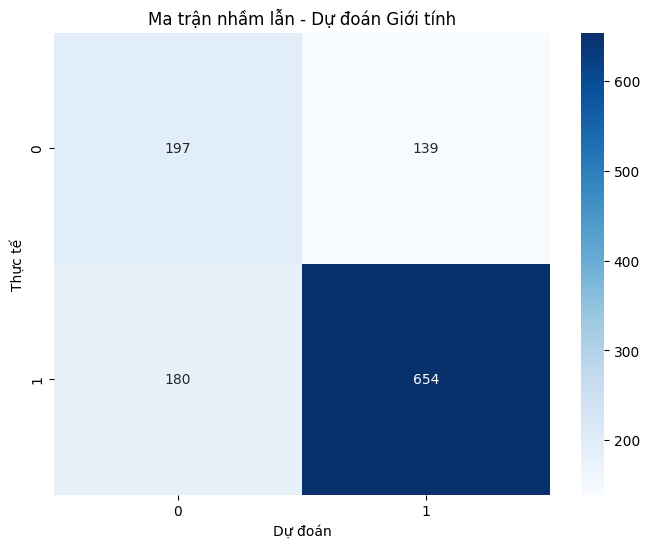

In [ ]:
# Vẽ heatmap cho ma trận nhầm lẫn của Decision Tree - Giới tính
cm_gender_dt = confusion_matrix(y_test_gender, y_pred_gender_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gender_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Ma trận nhầm lẫn - Dự đoán Giới tính")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

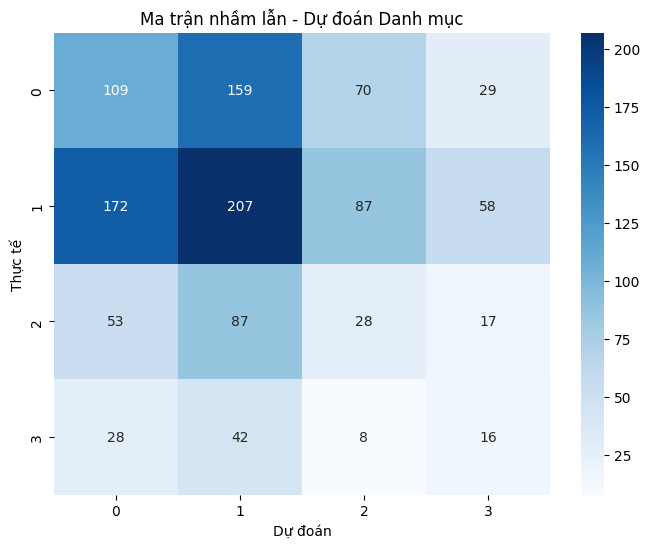

In [ ]:
from sklearn.metrics import confusion_matrix
# Tạo ma trận nhầm lẫn cho Decision Tree - Category
cm_category_dt = confusion_matrix(y_test_category, y_pred_category_dt)

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_category_dt, annot=True, fmt='d', cmap='Blues', xticklabels=dt_category.classes_, yticklabels=dt_category.classes_)
plt.title("Ma trận nhầm lẫn - Dự đoán Danh mục")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()


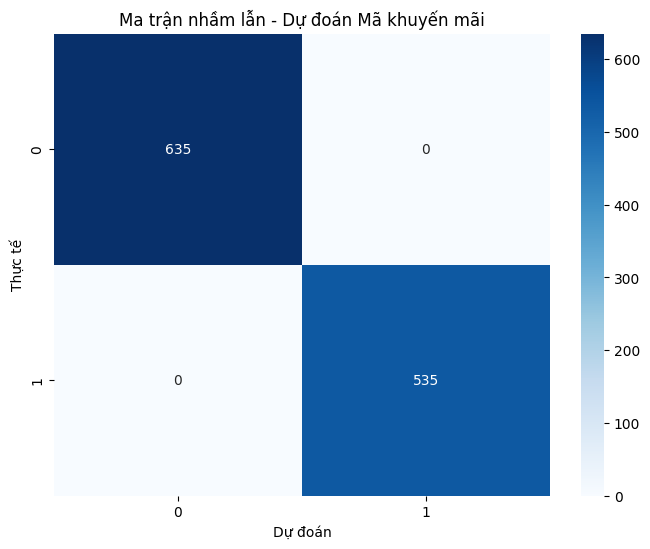

In [ ]:
cm_promo_dt = confusion_matrix(y_test_promo, y_pred_promo_dt)

# Vẽ heatmap cho ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_promo_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Ma trận nhầm lẫn - Dự đoán Mã khuyến mãi")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

In [ ]:
sample_inputs = X_test_gender[:5]
sample_true_outputs = y_test_gender[:5]
sample_predictions = y_pred_gender_rf[:5]

print("\nSample Inputs (Dự đoán Giới tính):")
print(sample_inputs)
print("\nSample True Outputs (Giới tính thực):")
print(sample_true_outputs.values)
print("\nSample Predictions (Giới tính dự đoán):")
print(sample_predictions)



Sample Inputs (Dự đoán Giới tính):
      Age  Purchase Amount (USD)  Location  Size  Color  Season  \
839    48                     31        12     0     20       1   
1717   29                     50        10     0     14       2   
321    41                     36        44     0     14       2   
3187   67                     72        42     0      9       3   
2269   49                     38        16     1     24       0   

      Review Rating  Subscription Status  Shipping Type  Discount Applied  \
839             2.6                    1              2                 1   
1717            2.9                    0              1                 0   
321             4.7                    1              2                 1   
3187            3.2                    0              2                 0   
2269            4.4                    0              5                 0   

      Previous Purchases  Payment Method  Frequency of Purchases  
839                   10       

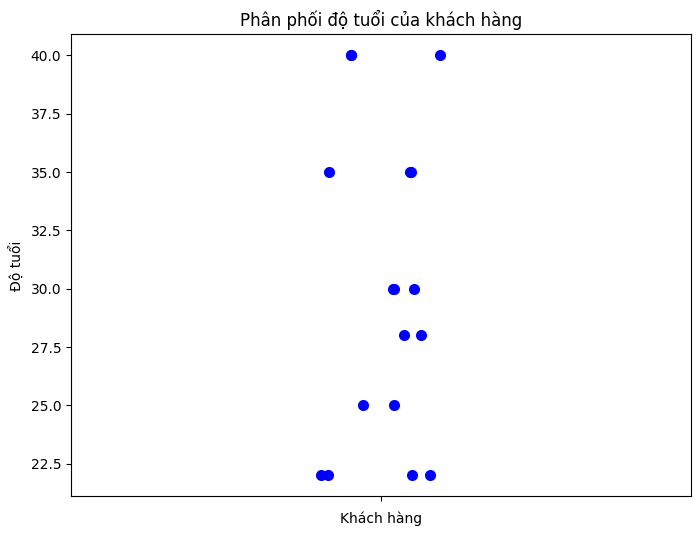

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dữ liệu mẫu về độ tuổi của khách hàng
ages = [22, 25, 28, 30, 35, 40, 22, 25, 22, 30, 28, 35, 40, 40, 35, 30, 22]

# Vẽ biểu đồ hạt
plt.figure(figsize=(8, 6))
sns.stripplot(ages, jitter=True, color='blue', size=8)

# Thiết lập nhãn và tiêu đề
plt.xlabel('Khách hàng')
plt.ylabel('Độ tuổi')
plt.title('Phân phối độ tuổi của khách hàng')

plt.show()


<ipython-input-15-e11cd101b773>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Promo Code Used', data=data, palette='Set2')


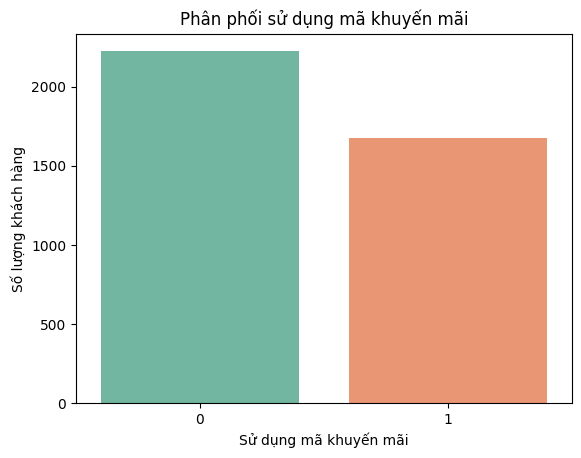

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử dữ liệu 'Promo Code Used' có các giá trị 0 (không sử dụng) và 1 (đã sử dụng)
sns.countplot(x='Promo Code Used', data=data, palette='Set2')

# Thêm nhãn và tiêu đề
plt.xlabel('Sử dụng mã khuyến mãi')
plt.ylabel('Số lượng khách hàng')
plt.title('Phân phối sử dụng mã khuyến mãi')

plt.show()


Nhận xét:
- Random Forest thường đạt độ chính xác cao hơn Decision Tree do khả năng kết hợp nhiều cây để giảm lỗi tổng quát hóa.
- Dựa vào bảng kết quả, Random Forest hoạt động tốt hơn đáng kể trong dự đoán Mã khuyến mãi.
- Ảnh hưởng của tham số max_depth: Khi max_depth tăng, độ chính xác ban đầu cải thiện, nhưng có thể giảm do overfitting.
- Biểu đồ heatmap giúp trực quan hóa các lỗi phân loại chính và cải thiện mô hình.